In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import pandas as pd
import os

# to make this notebook's output stable across runs
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

In [3]:
processedDataX_path = "backup/preprocessedSamples_X_samples_allGuitar_20480_Mm7_R1B.data"
processedDatay_path = "backup/preprocessedSamples_y_samples_allGuitar_20480_Mm7_R1B.data"
processedData_path = ""

if os.path.isfile(processedDataX_path): #if already preprocessed
	processedX = np.load(processedDataX_path)
	processedy = np.load(processedDatay_path)
else:
	import pandas as pd
	import librosa
	df = pd.read_csv('samples_allGuitar_20480_Mm7_R1B.csv')
	# df = pd.read_csv('samples_nylonGuitar_1024_Mm7_R03.csv')
	# df = pd.read_csv('../CachedData.csv')

	X_load = np.array(df.iloc[:,:-1], dtype=np.float)
	y_load = np.array(df.iloc[:,-1], dtype=np.float)
	processedX = np.zeros((len(X_load),12,80,1), dtype=np.float)
	processedy = np.zeros(len(y_load), dtype=np.float)
	for i in range(len(X_load)):
		# sample = librosa.core.stft(y=X_load[i], n_fft=2048, win_length=128, window='hamming', center=True, dtype=np.float32, pad_mode='reflect')
		sample = librosa.feature.chroma_stft(y=X_load[i], sr=44100, n_fft=20480, hop_length=258)
		sample = np.atleast_3d(sample)
		processedX[i] = sample
		processedy[i] = y_load[i]
		if i % 400 == 0:
			print(i)
	
	processedX.dump(processedDataX_path)
	processedy.dump(processedDatay_path)

from sklearn.utils import shuffle
print(processedy)
sprocessedX, sprocessedy = shuffle(processedX, processedy)
print(len(sprocessedX))
	
trainRange = int(len(sprocessedX) * 0.9)
validRange = int(len(sprocessedX) * 1)
testRange = int(len(sprocessedX) * 0.1)


X_train = np.array(sprocessedX[:trainRange], dtype=np.float)
y_train = np.array(sprocessedy[:trainRange], dtype=np.float)

X_valid = np.array(sprocessedX[trainRange:validRange], dtype=np.float)
y_valid = np.array(sprocessedy[trainRange:validRange], dtype=np.float)

X_test = np.array(sprocessedX[testRange:], dtype=np.float)
y_test = np.array(sprocessedy[testRange:], dtype=np.float)
print(y_test[1])
print(sprocessedX.shape)

[  0.   0.   0. ...,  40.  40.  40.]
2343
36.0
(2343, 12, 80, 1)


In [19]:
print(sprocessedy);print(sprocessedy.shape)
n_each_k = np.zeros(48)
for k in range(49):
    for m in sprocessedy:
        if m == k:
            n_each_k[k] += 1
        
print(n_each_k)

[ 39.  38.   0. ...,  27.  16.  39.]
(2343,)
[  82.   47.   64.   53.   48.   57.   40.   35.   67.  108.   58.   60.
   31.   34.   35.   37.   72.   66.   69.   47.   76.   68.   43.   36.
   71.   49.   38.   34.  101.   28.   57.   25.   24.   24.   27.   22.
   74.   63.   73.   46.   43.   23.   25.   19.   36.   49.   28.   31.]


In [48]:
X = np.array(df.iloc[15,:20480])
print(X.shape)
X2 = np.array(df2.iloc[14,:-1])
X2.shape

(20480,)


(20480,)

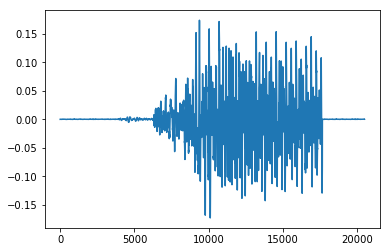

In [39]:
plt.plot(X2)
plt.show()

In [49]:
import numpy as np
from scipy.io.wavfile import write

write('testX6.wav', 44100, X)
write('testX7.wav', 44100, X2)

In [59]:
import librosa
import librosa.display
%matplotlib inline
sample = librosa.core.stft(y=X, n_fft=2048, hop_length=None, win_length=512, window='hamming', center=True, dtype=np.float, pad_mode='reflect')
sample2 = librosa.core.stft(y=X2, n_fft=2048, hop_length=None, win_length=512, window='hamming', center=True, dtype=np.float, pad_mode='reflect')

sample_chroma = librosa.feature.chroma_stft(y=X, sr=44100, n_fft=20480, hop_length=90)
sample_chroma2 = librosa.feature.chroma_stft(y=X2, sr=44100, n_fft=20480, hop_length=90)

C:\Users\Denis\AppData\Local\conda\conda\envs\tensorflow_env_gpu\lib\site-packages\librosa\core\spectrum.py:180: ComplexWarning: Casting complex values to real discards the imaginary part
  axis=0)[:stft_matrix.shape[0]].conj()


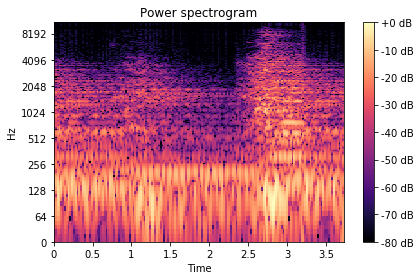

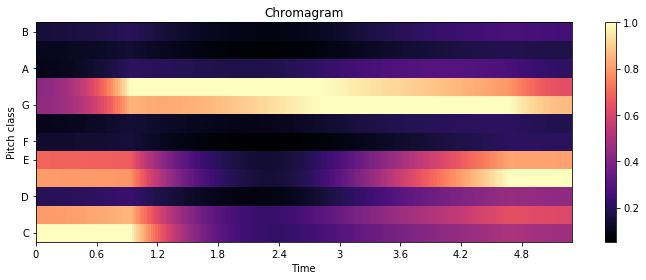

In [60]:
import matplotlib.pyplot as plt
import librosa.display
librosa.display.specshow(librosa.amplitude_to_db(sample,ref=np.max),y_axis='log', x_axis='time')
plt.title('Power spectrogram')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()

plt.figure(figsize=(10, 4))
librosa.display.specshow(sample_chroma, y_axis='chroma', x_axis='time')
plt.colorbar()
plt.title('Chromagram')
plt.tight_layout()


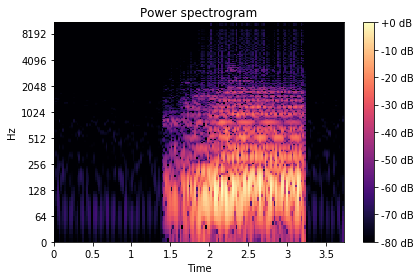

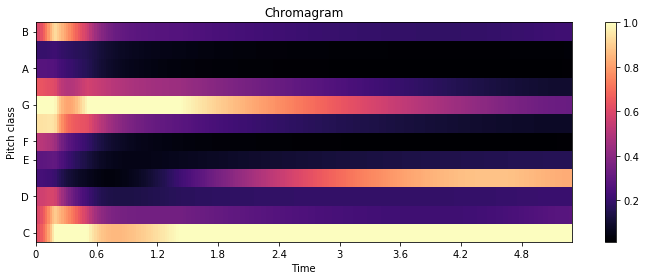

In [61]:

import matplotlib.pyplot as plt
import librosa.display
librosa.display.specshow(librosa.amplitude_to_db(sample2,ref=np.max),y_axis='log', x_axis='time')
plt.title('Power spectrogram')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()

plt.figure(figsize=(10, 4))
librosa.display.specshow(sample_chroma2, y_axis='chroma', x_axis='time')
plt.colorbar()
plt.title('Chromagram')
plt.tight_layout()

In [16]:
#!usr/bin/env python  
#coding=utf-8  

import pyaudio  
import wave  

#define stream chunk   
chunk = 20480  

#open a wav format music  
f = X
#instantiate PyAudio  
p = pyaudio.PyAudio()  
#open stream  
stream = p.open(format = p.get_format_from_width(f.getsampwidth()),  
                channels = f.getnchannels(),  
                rate = f.getframerate(),  
                output = True)  
#read data  
data = X

#play stream  
while data:  
    stream.write(data)  
    data = f.readframes(chunk)  

#stop stream  
stream.stop_stream()  
stream.close()  

#close PyAudio  
p.terminate() 

ModuleNotFoundError: No module named 'pyaudio'